In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

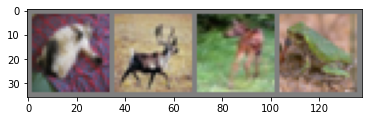

cat   deer  deer  frog 


In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [3]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [4]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.211
[1,  4000] loss: 1.892
[1,  6000] loss: 1.697
[1,  8000] loss: 1.595
[1, 10000] loss: 1.529
[1, 12000] loss: 1.484
[2,  2000] loss: 1.383
[2,  4000] loss: 1.375
[2,  6000] loss: 1.342
[2,  8000] loss: 1.313
[2, 10000] loss: 1.289
[2, 12000] loss: 1.280
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

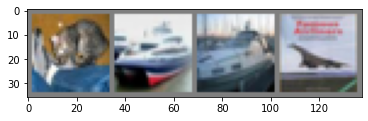

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [13]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 57.2 %
Accuracy for class: car   is 68.3 %
Accuracy for class: bird  is 48.7 %
Accuracy for class: cat   is 28.2 %
Accuracy for class: deer  is 45.1 %
Accuracy for class: dog   is 46.1 %
Accuracy for class: frog  is 75.0 %
Accuracy for class: horse is 63.6 %
Accuracy for class: ship  is 69.6 %
Accuracy for class: truck is 49.9 %


In [18]:
inputs.shape

torch.Size([4, 3, 32, 32])

In [22]:
'''import torch
from pytorch2keras.converter import pytorch_to_keras


x = torch.randn(1, 3, 32, 32, requires_grad=False) # dummy input
k_model = pytorch_to_keras(net, x, [(3, None, None,)], verbose=True)
k_model.save('converted_from_pth_keras_model_cifar10.h5')'''

"import torch\nfrom pytorch2keras.converter import pytorch_to_keras\n\n\nx = torch.randn(1, 3, 32, 32, requires_grad=False) # dummy input\nk_model = pytorch_to_keras(net, x, [(3, None, None,)], verbose=True)\nk_model.save('converted_from_pth_keras_model_cifar10.h5')"

In [29]:
import torch.onnx 

#Function to Convert to ONNX 
def Convert_ONNX(): 

    # set the model to inference mode 
    net.eval() 

    # Let's create a dummy input tensor  
    dummy_input = torch.randn(1, 3, 32, 32, requires_grad=True)  

    # Export the model   
    torch.onnx.export(net,         # model being run 
         dummy_input,       # model input (or a tuple for multiple inputs) 
         "ImageClassifier.onnx",       # where to save the model  
         export_params=True,  # store the trained parameter weights inside the model file 
         opset_version=10,    # the ONNX version to export the model to 
         do_constant_folding=True,  # whether to execute constant folding for optimization 
         input_names = ['modelInput'],   # the model's input names 
         output_names = ['modelOutput'], # the model's output names 
         dynamic_axes={'modelInput' : {0 : 'batch_size'},    # variable length axes 
                                'modelOutput' : {0 : 'batch_size'}}) 
    print(" ") 
    print('Model has been converted to ONNX') 

In [30]:
Convert_ONNX() 

 
Model has been converted to ONNX


In [31]:
import onnx2keras
from onnx2keras import onnx_to_keras
import keras
import onnx

In [44]:
onnx_model = onnx.load('ImageClassifier.onnx')
input_all = [node.name for node in onnx_model.graph.input]
print(input_all)

['modelInput']


In [52]:
k_model = onnx_to_keras(onnx_model, ['modelInput'], name_policy='renumerate')

keras.models.save_model(k_model,'converted_kerasModel.h5',overwrite=True,include_optimizer=True)

INFO:onnx2keras:Converter is called.
DEBUG:onnx2keras:List input shapes:
DEBUG:onnx2keras:None
DEBUG:onnx2keras:List inputs:
DEBUG:onnx2keras:Input 0 -> modelInput.
DEBUG:onnx2keras:List outputs:
DEBUG:onnx2keras:Output 0 -> modelOutput.
DEBUG:onnx2keras:Gathering weights to dictionary.
DEBUG:onnx2keras:Found weight conv1.weight with shape (6, 3, 5, 5).
DEBUG:onnx2keras:Found weight conv1.bias with shape (6,).
DEBUG:onnx2keras:Found weight conv2.weight with shape (16, 6, 5, 5).
DEBUG:onnx2keras:Found weight conv2.bias with shape (16,).
DEBUG:onnx2keras:Found weight fc1.weight with shape (120, 400).
DEBUG:onnx2keras:Found weight fc1.bias with shape (120,).
DEBUG:onnx2keras:Found weight fc2.weight with shape (84, 120).
DEBUG:onnx2keras:Found weight fc2.bias with shape (84,).
DEBUG:onnx2keras:Found weight fc3.weight with shape (10, 84).
DEBUG:onnx2keras:Found weight fc3.bias with shape (10,).
DEBUG:onnx2keras:Found input modelInput with shape [3, 32, 32]
DEBUG:onnx2keras:######
DEBUG:onnx

DEBUG:onnx2keras:...
DEBUG:onnx2keras:Check if all inputs are available:
DEBUG:onnx2keras:Check input 0 (name onnx::Gemm_21).
DEBUG:onnx2keras:Check input 1 (name fc3.weight).
DEBUG:onnx2keras:The input not found in layers / model inputs.
DEBUG:onnx2keras:Found in weights, add as a numpy constant.
DEBUG:onnx2keras:Check input 2 (name fc3.bias).
DEBUG:onnx2keras:The input not found in layers / model inputs.
DEBUG:onnx2keras:Found in weights, add as a numpy constant.
DEBUG:onnx2keras:... found all, continue
DEBUG:onnx2keras:gemm:Convert GEMM with bias.
DEBUG:onnx2keras:gemm:Transposing W matrix.
DEBUG:onnx2keras:gemm:Input units 84, output units 10.


In [7]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.18.0-py3-none-any.whl (77 kB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Using cached numpy-1.18.5-cp38-cp38-win_amd64.whl (12.8 MB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Rolling back uninstall of numpy
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy-1.21.5.dist-info\
   from C:\Users\epoli\anaconda3\envs\Deep Learning\Lib\site-packages\~umpy-1.21.5.dist-info
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\__config__.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\__config__.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\__init__.cython-30.pxd
  Moving t

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\epoli\\anaconda3\\envs\\Deep Learning\\Lib\\site-packages\\numpy\\.libs\\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



   from C:\Users\epoli\anaconda3\envs\Deep Learning\Lib\site-packages\numpy\core\include\~umpy
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\core\lib\
   from C:\Users\epoli\anaconda3\envs\Deep Learning\Lib\site-packages\numpy\core\~ib
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\core\machar.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\core\machar.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\core\memmap.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\core\memmap.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\core\multiarray.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\core\multiarray.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\core\numeric.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\core\numeric.py
  Moving to c:\users

   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\distutils\misc_util.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\distutils\msvc9compiler.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\distutils\msvc9compiler.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\distutils\msvccompiler.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\distutils\msvccompiler.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\distutils\npy_pkg_config.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\distutils\npy_pkg_config.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\distutils\numpy_distribution.py
   from C:\Users\epoli\AppData\Local\Temp\pip-uninstall-sn38ed35\distutils\numpy_distribution.py
  Moving to c:\users\epoli\anaconda3\envs\deep learning\lib\site-packages\numpy\distutils\pathccompiler.py

In [8]:
import tensorflowjs

ModuleNotFoundError: No module named 'tensorflowjs'